<a href="https://colab.research.google.com/github/mathildebadoual/safe_rl/blob/master/safe_rl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

### Install Baseline module:

In [3]:
!apt install swig cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines==2.3.0 box2d box2d-kengz

Unable to locate an executable at "/Library/Java/JavaVirtualMachines/jdk1.8.0_151.jdk/Contents/Home/bin/apt" (-1)


You are using pip version 19.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install control
!pip install slycot

    100% |████████████████████████████████| 174kB 3.6MB/s ta 0:00:01
  Stored in directory: /Users/mathildebadoual/Library/Caches/pip/wheels/3b/7c/86/27549bba9cedd735b87e2ff3de06ed1d839f0fde0db3885ecb
Successfully built control
You are using pip version 19.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 1.5MB 3.7MB/s ta 0:00:01
  Stored in directory: /Users/mathildebadoual/Library/Caches/pip/wheels/96/d8/c4/494b13b8ec4d4829abc44533fe43af4812c6f44737ce084210
Successfully built slycot
You are using pip version 19.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Import gym and other dependencies

In [1]:
import os

import gym
import numpy as np
import matplotlib.pyplot as plt
import control
import math

from stable_baselines.ddpg.policies import MlpPolicy
from stable_baselines.common.vec_env.dummy_vec_env import DummyVecEnv
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import DDPG
from stable_baselines.ddpg.noise import AdaptiveParamNoiseSpec

/Users/mathildebadoual/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/mathildebadoual/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = gym.make('CartPole-v0')
# Logs will be saved in log_dir/monitor.csv
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

In [4]:
self.gravity = 9.8
masscart = 1.0
masspole = 0.1
total_mass = (self.masspole + self.masscart)
length = 0.5 # actually half the pole's length
polemass_length = (self.masspole * self.length)
force_mag = 10.0
tau = 0.02  # seconds between state updates


A = np.array([[0, 1], [3*g/(2*g), 0]])
B = np.array([[0], [3/(2*m*l)]])
Q = np.eye(2)
R = 0.1

K, _, _ = control.lqr(A, B, Q, R)

In [5]:
env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

max_steps = 100

obs = env.reset()
print('initial observation:', obs)
theta_list = []
thetadot_list = []
action_list = [0]
env.render()

for i in xrange(max_steps):
    state = np.array([math.atan2(obs[0], obs[1]), obs[2]])
    theta_list.append(state[0])
    thetadot_list.append(state[1])
    action = np.dot(K, state.reshape((2, 1)))
    action_list.append(action)
    obs, r, done, info = env.step(action)
    env.render()
    if done:
        break
env.close()

observation space: Box(3,)
action space: Box(1,)
initial observation: [ 0.87683592  0.48078974 -0.37643238]


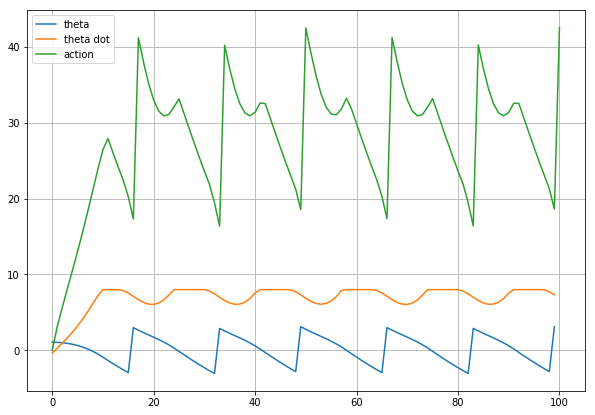

In [6]:
plt.figure(figsize=(10, 7))

plt.plot(theta_list, label='theta')
plt.plot(thetadot_list, label='theta dot')
plt.plot(action_list, label='action')
plt.grid()
plt.legend()